## As the size of the BNN model grows, we expect it to overfit and detect a difference between two very similar datasets, both of a brownian particle moving "forward".
## We're going all-in in attempt to overfit the model: hidden_size to 100, smaller dataset, more epochs than in `bayesian_brownian_varinf_discriminate_identical_forward.ipynb`

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from brownian_datagen import BrownianDatagen, create_dataholder_forward_same_as_backward
from bayesian_varinf import train_fb_n_times, load_learning_curves

In [3]:
save_dir_prefix = "20230724_preds/brownian_varinf_discriminate_identical_overfit_nonoise/"

brownian = BrownianDatagen(kBT=0.03, γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_forward_same_as_backward(brownian, numParticles=30,
                                                rng_seed1=42, rng_seed2=43)

train_fb_n_times(dt,
    num_runs=40,
    hidden_size=100,
    num_epochs=10000,
    save_metrics_every_n_epochs=100,
    train_test_split_ratio=None,
    save_dir_prefix=save_dir_prefix,
    torch_device="cuda:0" if torch.cuda.is_available() else None)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 130156.83it/s]


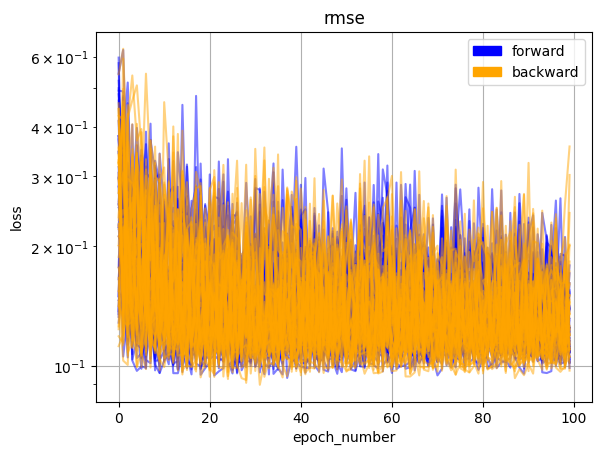

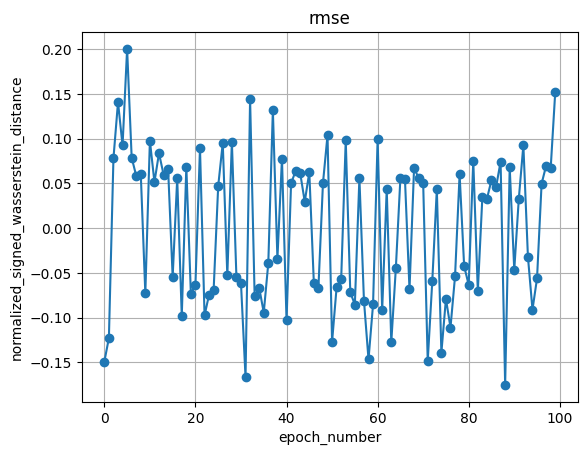

In [4]:
l = load_learning_curves(save_dir_prefix, num_runs=40, alt_metric="rmse")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Same but with much more noise

In [5]:
save_dir_prefix = "20230724_preds/brownian_varinf_discriminate_identical_overfit_noisy/"

brownian = BrownianDatagen(kBT=1., γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_forward_same_as_backward(brownian, numParticles=30,
                                                rng_seed1=42, rng_seed2=43)

train_fb_n_times(dt,
    num_runs=40,
    hidden_size=100,
    num_epochs=10000,
    save_metrics_every_n_epochs=100,
    train_test_split_ratio=None,
    save_dir_prefix=save_dir_prefix,
    torch_device="cuda:0" if torch.cuda.is_available() else None)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 88862.37it/s]


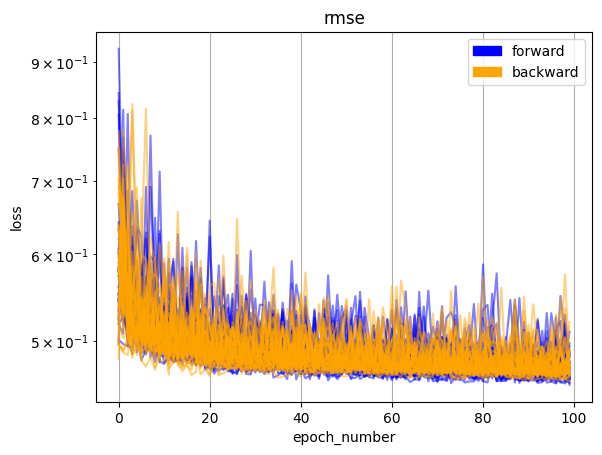

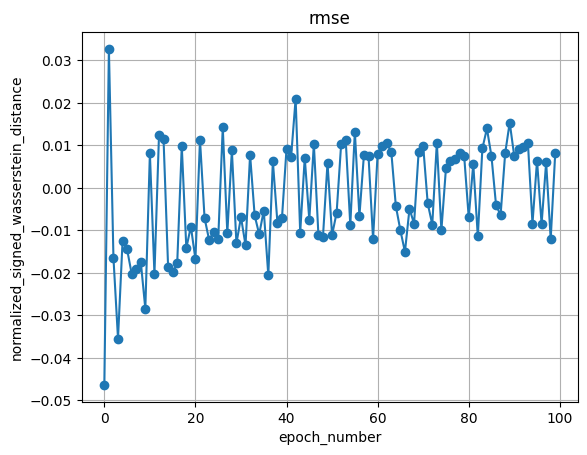

In [6]:
l = load_learning_curves(save_dir_prefix, num_runs=40, alt_metric="rmse")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Conclusion:

- we didn't observe overfitting